## Matplotlib 패키지/라이브러리

* 파이썬으로 데이터를 시각화할 때, 가장 많이 사용하는 라이브러리
    - 2D 형태의 그래프, 이미지 등을 그릴 때 사용
    - 실제 과학 컴퓨팅 연구 분야나 인공지능 연구 분야에서도 많이 활용
    - https://matplotlib.org (외부 라이브러리여서 독자적인 도메인을 가지고 있음)

* matplotlib 라이브러리인 pyplot 모듈 불러오기

In [1]:
import matplotlib.pyplot

* matplotlib 라이브러리인 pyplot 모듈을 'plt'라는 별명으로 부르기 (as, alias 에일리어스)

In [2]:
import matplotlib.pyplot as plt

## 기본 그래프 그리기


1. plot() 함수에 리스트 1개 입력하기
    - **plot() 함수** : 직선 또는 꺾은선 형태의 그래프를 그릴 때 사용
    - plt.plot()은 matplotlib.pyplot.plt()와 같은 명령어
    - plt.plot(list)의 형태 => 입력된 리스트 1개만 있을 때 y축 값으로 맞춰지고, x축 값은 자동으로 0부터 1씩 증가하는 정수로 입력

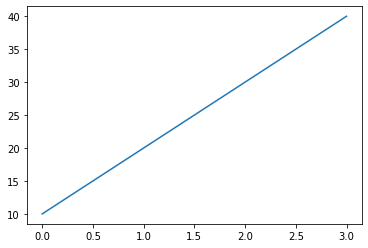

In [1]:
import matplotlib.pyplot as plt

plt.plot([10, 20, 30, 40])
plt.show()

2. plot() 함수에 리스트 2개 입력하기
    - 두 개의 리스트를 콤마(,)를 구분하여 입력
    - plt.plot(list1, list2)의 형태

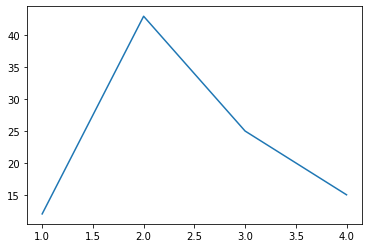

In [2]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [12, 43, 25, 15])
plt.show()

Q. 만약 x축 데이터와 y축 데이터의 개수가 맞지 않다면? `오류 발생`

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

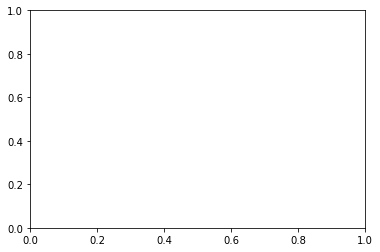

In [3]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4, 5], [12, 43, 25, 15])
plt.show()

Q. In[num]이 아니라 In[*]인 경우?

    - Alt+Tab을 눌러 새 창에 그래프가 생성된지 1차 확인
    - 새 창이 아닌 주피터 노트북 화면 안에서 그래프를 보고 싶다면, 맨 위에 %matplotlib inline 작성

## 그래프 옵션 추가하기

1. 그래프에 제목 넣기 : plt.title('제목으로 사용할 문자열')

    - 한글 제목을 넣으면, 한글을 지원하는 폰트 설정이 이루어지지 않음
    - plt.rc('font', family='Malgun Gothic') 추가

2. 그래프에 범례 넣기 : plt.plot([10, 20, 30, 40], legend='범례1')

    - 범례(legend)는 그래프가 의미하는 바를 구별하기 위해 사용
    - 그래프를 그리기 전 plt.legend()를 실행

    - 범례 위치 조정을 하려면 loc이라는 속성에 값을 넣어줌 (0~10까지 가능 / 0은 그래프에 따라 자동 설정)

3. 그래프 색상 바꾸기 : plt.plot([10, 20, 30, 40], color='skyblue')

    - 다양한 색상 이름 확인방법 : https://matplotlib.org/stable/gallery/color/named_colors.html
    - 색상 표현 시, 기본 색 몇 가지는 약자 표기 가능 r(red), g(green), b(blue), k(black), y(yellow)

4. 그래프 선 모양 바꾸기 : linestyle 지정 (linestyle 대신 ls라고도 쓸 수 있음)

    - 예) --, : 등
    - 다양한 라인 스타일 : https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

5. 마커 모양 바꾸기

    - plot() 함수에 marker 속성을 설정하면 선 형태가 아닌 점 형태로 그래프를 그릴 수 있음
    - 다양한 마커 : https://matplotlib.org/stable/api/markers_api.html

* 참고로, 한글 폰트/색상/마커/선의 종류 & <색상><마커모양><선모양> 등올 줄여서 쓰는 방법도 있음
* 데이터 개수 확인 : len() 함수 사용

In [9]:
# 최고 기온 데이터 꺾은선 그래프로 그리기

import csv

f = open('incheon_weather.csv', 'r')
data = csv.reader(f)
next(data)
result = []     # 최고 기온 데이터를 저장할 빈 리스트 생성

for row in data:

    # 최고 기온 데이터 값이 존재하면 result 리스트에 최고 기온 값 추가
    if row[-1] != '':
        result.append(float(row[-1]))

f.close()

# result에 저장된 값 확인
# print(result)

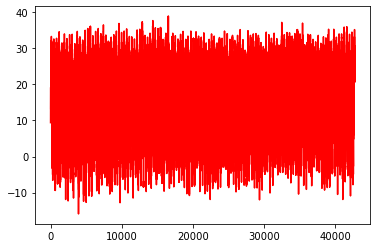

In [10]:
import matplotlib.pyplot as plt

plt.plot(result, color='red')  # result 리스트에 저장된 값을 빨간색 그래프로 그리기
plt.show()                     # 그래프 나타내기

## 특정한 날의 데이터만 뽑아서 그래프로 그려보기

* 문자열을 분리하는 split() 함수
    - 사용자가 설정하는 특정 문자를 기준으로 분리
    - 특정 문자가 없다면 기본적으로 공백 문자를 기준으로 문자열 분리 (지정 시 해당 문자로 분리)


* 리스트의 인덱싱 기능을 활용해, 날짜의 연, 월, 일 각각 추출

In [13]:
### 9월 13일의 최고 기온 데이터 시각화

import csv

f = open('incheon_weather.csv', 'r')
data = csv.reader(f)
next(data)
result = []  # 최고 기온 데이터를 저장할 빈 리스트 생성

for row in data:
    # 최고 기온 데이터 값이 존재한다면
    if row[-1] != '':
        # 9월 13일에 해당한다면
        if row[0].split('-')[1] == '09' and row[0].split('-')[2] == '13':
            # result 리스트에 최고 기온 값 추가
            result.append(float(row[-1]))

f.close()
print(len(result))

117


## 특정한 날의 최고 기온 및 최저 기온 데이터 시각화하기

- 자신이 태어난 해를 기준(2000년)으로 해당 년도 이후부터의 데이터만 추출
- 최고 기온 뿐만 아니라, 최저 기온 데이터도 함께 나타내기

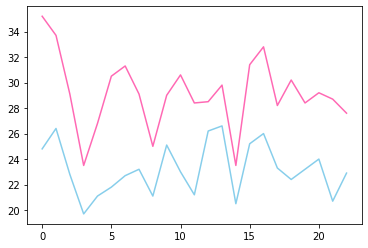

In [15]:
# 2000년 8월 18일부터 현재까지 매년 8월 18일의 데이터 추출 및 시각화

import csv
import matplotlib.pyplot as plt

f = open('incheon_weather.csv', 'r')
data = csv.reader(f)
next(data)
high = []       # 최고 기온 데이터를 저장할 빈 리스트 high 생성
low = []        # 최저 기온 데이터를 저장할 빈 리스트 low 생성

for row in data:

    # 최고 기온과 최저 기온 데이터 값이 존재한다면
    if row[-1] != '' and row[-2] != '':

        # 출생년도 이후 데이터 비교
        if int(row[0].split('-')[0]) >= 2000:
            # 8월 18일에 해당한다면
            if row[0].split('-')[1] == '08' and row[0].split('-')[2] == '18':
                high.append(float(row[-1]))     # high 리스트에 최고 기온 값 추가
                low.append(float(row[-2]))      # low 리스트에 최저 기온 값 추가

f.close()

plt.plot(high, color='hotpink')     # high 리스트에 저장된 값을 hotpink 색 그래프로 그리기
plt.plot(low, color='skyblue')      # low 리스트에 저장된 값을 skyblue 색 그래프로 그리기
plt.show()                          # 그래프 나타내기

*만약, 온도 중 마이너스 부호가 표현되지 않는 경우*<br>
`plt.rcParams['axes.unicode_minus'] = False` 코드 추가하기

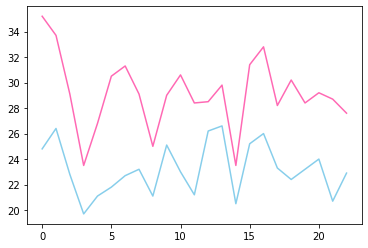

In [16]:
# 2000년 8월 18일부터 현재까지 매년 8월 18일의 데이터 추출 및 시각화

import csv
import matplotlib.pyplot as plt

f = open('incheon_weather.csv', 'r')
data = csv.reader(f)
next(data)
high = []       # 최고 기온 데이터를 저장할 빈 리스트 high 생성
low = []        # 최저 기온 데이터를 저장할 빈 리스트 low 생성

for row in data:

    # 최고 기온과 최저 기온 데이터 값이 존재한다면
    if row[-1] != '' and row[-2] != '':

        # 출생년도 이후 데이터 비교
        if int(row[0].split('-')[0]) >= 2000:
            # 8월 18일에 해당한다면
            if row[0].split('-')[1] == '08' and row[0].split('-')[2] == '18':
                high.append(float(row[-1]))     # high 리스트에 최고 기온 값 추가
                low.append(float(row[-2]))      # low 리스트에 최저 기온 값 추가

f.close()

plt.rcParams['axes.unicode_minus'] = False
plt.plot(high, color='hotpink')     # high 리스트에 저장된 값을 hotpink 색 그래프로 그리기
plt.plot(low, color='skyblue')      # low 리스트에 저장된 값을 skyblue 색 그래프로 그리기
plt.show()                          # 그래프 나타내기